In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('DBAS-Step2-Data Understanding').getOrCreate()

# Enable pandas-on-Spark
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

#from pyspark.pandas import DataFrame as pds
###################-------------import pyspark.pandas as ps
print(pyspark.__version__)


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/08 01:54:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


3.2.1


In [2]:
## Load data from csv file
spk_df = spark.read.csv("Data/heart_failure_dataset.csv", header=True, inferSchema=True)

# Convert Spark DataFrame to pandas-on-Spark DataFrame using to_pandas_on_spark()
spkpd_df = spk_df.to_pandas_on_spark()
spkpd_df = spkpd_df.to_pandas()

spkpd_df.head()


23/10/08 01:54:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/08 01:54:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Get summary statistics
print(spkpd_df.describe())
print("--------------------------------------------")

# Use the round() method on the DataFrame
# spkpd_df_desc = spkpd_df.describe().round(2)

# Transpose and round
# spkpd_df_desc_transposed_rounded = spkpd_df_desc.transpose().round(2)
spkpd_df_desc_transposed_rounded = spkpd_df.describe().transpose().round(2)


print(spkpd_df_desc_transposed_rounded)
print("--------------------------------------------")

# Check data types
print(spkpd_df.dtypes)

              age     anaemia  creatinine_phosphokinase    diabetes  ejection_fraction  high_blood_pressure      platelets  serum_creatinine  serum_sodium         sex    smoking        time  DEATH_EVENT
count  299.000000  299.000000                299.000000  299.000000         299.000000           299.000000     299.000000         299.00000    299.000000  299.000000  299.00000  299.000000    299.00000
mean    60.833893    0.431438                581.839465    0.418060          38.083612             0.351171  263358.029264           1.39388    136.625418    0.648829    0.32107  130.260870      0.32107
std     11.894809    0.496107                970.287881    0.494067          11.834841             0.478136   97804.236869           1.03451      4.412477    0.478136    0.46767   77.614208      0.46767
min     40.000000    0.000000                 23.000000    0.000000          14.000000             0.000000   25100.000000           0.50000    113.000000    0.000000    0.00000    4.00000

In [4]:
# describe data
spkpd_df['age'].describe()

# description of continuous fields
spkpd_df_desc_con = spkpd_df[['age','creatinine_phosphokinase',\
                                  'ejection_fraction','platelets',\
                            'serum_creatinine','serum_sodium','time']].describe()
spkpd_df_desc_con.round(2)
spkpd_df_desc_con.transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.83,11.89,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.84,970.29,23.0,115.0,250.0,582.0,7861.0
ejection_fraction,299.0,38.08,11.83,14.0,30.0,38.0,45.0,80.0
platelets,299.0,263358.03,97804.24,25100.0,212000.0,262000.0,304000.0,850000.0
serum_creatinine,299.0,1.39,1.03,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.63,4.41,113.0,134.0,137.0,140.0,148.0
time,299.0,130.26,77.61,4.0,73.0,115.0,205.0,285.0


In [5]:
# convert the data types
print(spkpd_df.dtypes)
print("--------------------------------------------")
spkpd_df = spkpd_df.astype({
    'anaemia' : bool, 
    'high_blood_pressure' : bool, 
    'smoking' : bool, 
    'diabetes' : bool, 
    'DEATH_EVENT' : bool,
    'sex' : bool,
    })
    
print(spkpd_df.dtypes)
print("--------------------------------------------")

# description of Boolean fields
print(spkpd_df['DEATH_EVENT'].value_counts())
print(spkpd_df['sex'].value_counts())
print(spkpd_df['smoking'].value_counts())
print(spkpd_df['anaemia'].value_counts())
print(spkpd_df['high_blood_pressure'].value_counts())
print(spkpd_df['diabetes'].value_counts())

age                         float64
anaemia                       int32
creatinine_phosphokinase      int32
diabetes                      int32
ejection_fraction             int32
high_blood_pressure           int32
platelets                   float64
serum_creatinine            float64
serum_sodium                  int32
sex                           int32
smoking                       int32
time                          int32
DEATH_EVENT                   int32
dtype: object
--------------------------------------------
age                         float64
anaemia                        bool
creatinine_phosphokinase      int32
diabetes                       bool
ejection_fraction             int32
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int32
sex                            bool
smoking                        bool
time                          int32
DEATH_EVENT                    bool
dtype

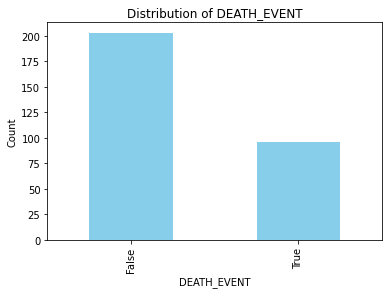

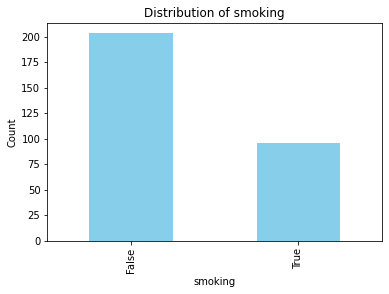

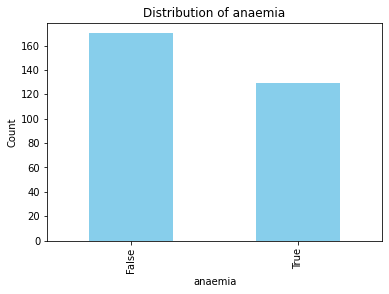

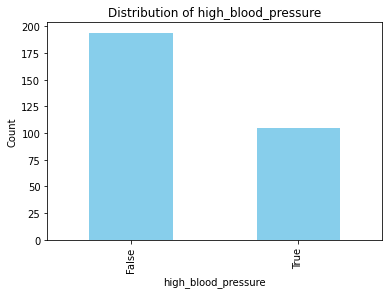

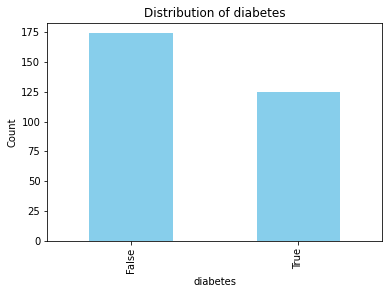

In [6]:
### ---2.3 Explore data
# Add Visualisations
import matplotlib.pyplot as plt
from pyspark.pandas.config import set_option
set_option("plotting.backend", "matplotlib")

variables = ['DEATH_EVENT', 'smoking', 'anaemia', 'high_blood_pressure', 'diabetes']

for var in variables:
    fig, ax = plt.subplots()  # Create a new Axes object for each variable
    spkpd_df[var].value_counts().plot.bar(ax=ax, color='skyblue')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {var}')
    plt.show()
    


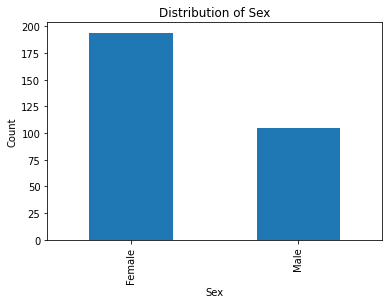

In [7]:
# Distribution of sex

fig, ax = plt.subplots()  # Create a new Axes object for each variable
spkpd_df['sex'].value_counts().plot.bar(ax=ax)
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sex')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # set labels as 'Female' and 'Male'
plt.show()

23/10/08 01:55:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/08 01:55:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/08 01:55:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


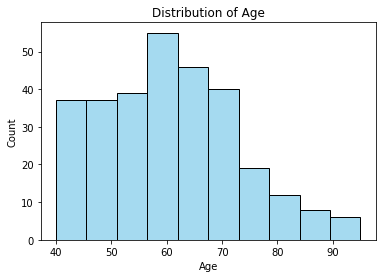

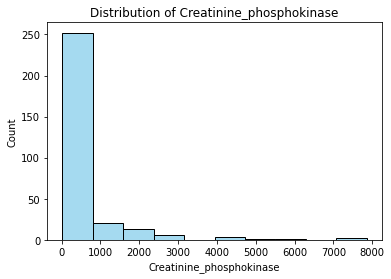

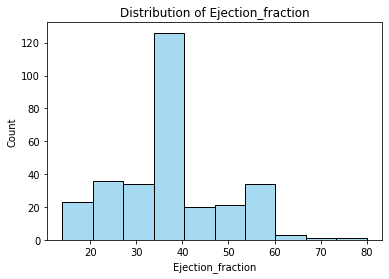

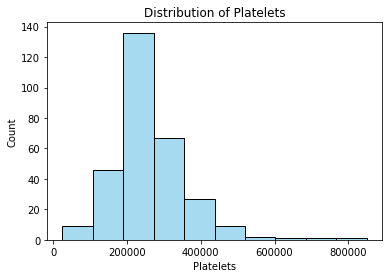

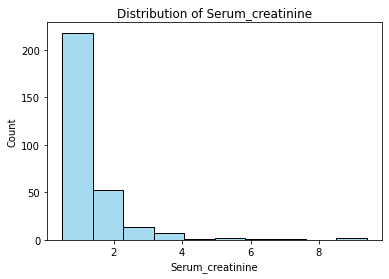

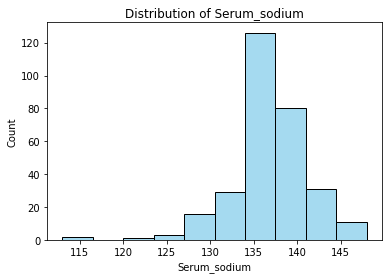

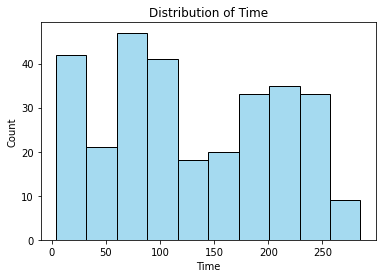

In [8]:
# distribution of 7 continuous fields  

import seaborn as sns

fields = ['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
pandas_df = spkpd_df.to_pandas()

for field in fields:
    plt.figure()  # create new figure for each field
    sns.histplot(pandas_df[field], bins=10, edgecolor='black', color='skyblue')
    plt.xlabel(field.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {field.capitalize()}')
    plt.show()



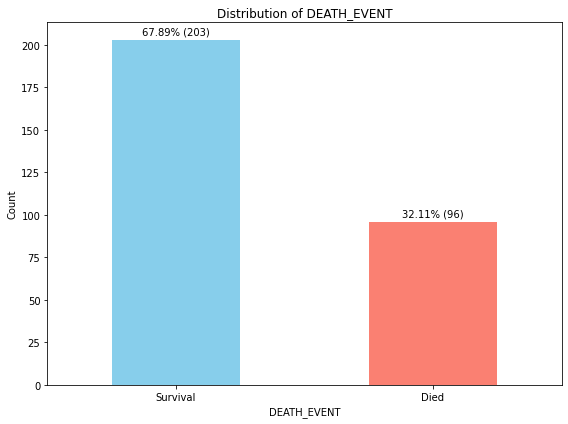

In [9]:
### ---2.4 Verify the data quality
## varify data balance of death-event

# Verify the distribution of DEATH_EVENT
death_event_counts = spkpd_df['DEATH_EVENT'].value_counts()
total = len(spkpd_df)


# Plot the bar chart
ax = death_event_counts.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 6))


# Annotate the count and percentage on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}% ({})'.format(100 * height / total, height),
            ha="center")

# Set title and labels
plt.xticks(ticks=[0, 1], labels=['Survival', 'Died'])  # set labels as 'Died' and 'survival'
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()



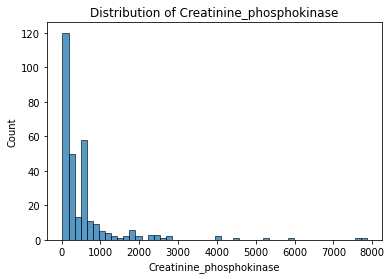

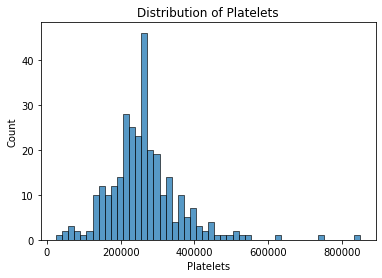

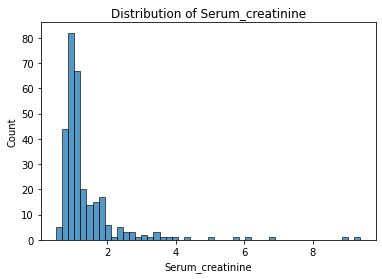

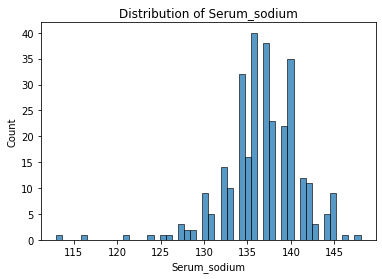

In [12]:
## Verify the outliners
# Detect outliners

import seaborn as sns

fields = ['creatinine_phosphokinase','platelets','serum_creatinine','serum_sodium']
pandas_df = spkpd_df.to_pandas()

for field in fields:
    plt.figure()  # create new figure for each field
    sns.histplot(pandas_df[field], bins=50)
    plt.xlabel(field.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {field.capitalize()}')
    plt.show()
    